<a href="https://colab.research.google.com/github/Jayasriramsankarasetty/NestleStockPricePrediction/blob/main/StockPricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stock Market Analysis and Prediction

## Project Introduction

This project aims to analyze and predict the closing price of a stock using historical trading data. The analysis involves exploring the dataset, visualizing key trends and relationships, engineering relevant features, and building a predictive model using Linear Regression.

## Dataset Description

The dataset contains historical stock trading data for a specific company (NESTLE). It includes the following columns:

*   **Date**: The trading date.
*   **Open Price**: The price at which the stock opened on a given day.
*   **High Price**: The highest price reached by the stock during the day.
*   **Low Price**: The lowest price reached by the stock during the day.
*   **Close Price**: The price at which the stock closed on a given day (the target variable).
*   **WAP**: Weighted Average Price.
*   **No. of Shares**: The number of shares traded during the day.
*   **No. of Trades**: The total number of trades executed during the day.
*   **Total Turnover (Rs.)**: The total value of shares traded.
*   **Deliverable Quantity**: The number of shares delivered.
*   **% Deli. Qty to Traded Qty**: Percentage of deliverable quantity to traded quantity.
*   **Spread High-Low**: The difference between the high and low price.
*   **Spread Close-Open**: The difference between the close and open price.

The goal is to predict the `Close Price` using other relevant features.

In [211]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [212]:
# Load the dataset
df = pd.read_csv("/content/nestle.csv")

In [213]:
# Display the shape of the DataFrame
print(f"Shape of the DataFrame: {df.shape}")

Shape of the DataFrame: (2553, 13)


In [214]:
# Check for missing values
print("Missing values per column:\n", df.isnull().sum())

Missing values per column:
 Date                         0
Open Price                   0
High Price                   0
Low Price                    0
Close Price                  0
WAP                          0
No.of Shares                 0
No. of Trades                0
Total Turnover (Rs.)         0
Deliverable Quantity         2
% Deli. Qty to Traded Qty    2
Spread High-Low              0
Spread Close-Open            0
dtype: int64


In [215]:
df_new = df.drop(columns=["Date"])
df_new

,Open Price,High Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open
0,18150.00,18572.95,17772.90,18205.80,18130.183442,4590,1770,83217542.0,950.0,20.70,800.05,55.80
1,18100.10,18415.00,18017.15,18313.70,18295.559071,6069,1321,111035748.0,4677.0,77.06,397.85,213.60
2,18470.05,18718.00,17845.60,17943.15,18355.093320,2904,716,53303191.0,1619.0,55.75,872.40,-526.90
3,18294.50,18684.50,18294.50,18549.85,18511.224599,1496,586,27692792.0,557.0,37.23,390.00,255.35
4,18371.20,18549.30,18248.25,18343.90,18388.967826,1150,550,21147313.0,573.0,49.83,301.05,-27.30
...,...,...,...,...,...,...,...,...,...,...,...,...
2548,4114.00,4160.00,4076.00,4143.25,4129.486321,3107,444,12830314.0,2069.0,66.59,84.00,29.25
2549,4118.00,4126.90,4080.00,4101.85,4106.848723,1018,270,4180772.0,357.0,35.07,46.90,-16.15
2550,4100.00,4125.00,4081.40,4120.60,4105.106055,2857,247,11728288.0,2312.0,80.92,43.60,20.60
2551,4061.00,4110.10,4060.10,4095.35,4091.474315,5003,886,20469646.0,2817.0,56.31,50.00,34.35


In [216]:
df_new.dropna(inplace=True)
df_new

,Open Price,High Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open
0,18150.00,18572.95,17772.90,18205.80,18130.183442,4590,1770,83217542.0,950.0,20.70,800.05,55.80
1,18100.10,18415.00,18017.15,18313.70,18295.559071,6069,1321,111035748.0,4677.0,77.06,397.85,213.60
2,18470.05,18718.00,17845.60,17943.15,18355.093320,2904,716,53303191.0,1619.0,55.75,872.40,-526.90
3,18294.50,18684.50,18294.50,18549.85,18511.224599,1496,586,27692792.0,557.0,37.23,390.00,255.35
4,18371.20,18549.30,18248.25,18343.90,18388.967826,1150,550,21147313.0,573.0,49.83,301.05,-27.30
...,...,...,...,...,...,...,...,...,...,...,...,...
2548,4114.00,4160.00,4076.00,4143.25,4129.486321,3107,444,12830314.0,2069.0,66.59,84.00,29.25
2549,4118.00,4126.90,4080.00,4101.85,4106.848723,1018,270,4180772.0,357.0,35.07,46.90,-16.15
2550,4100.00,4125.00,4081.40,4120.60,4105.106055,2857,247,11728288.0,2312.0,80.92,43.60,20.60
2551,4061.00,4110.10,4060.10,4095.35,4091.474315,5003,886,20469646.0,2817.0,56.31,50.00,34.35


In [217]:
df_new.isnull().sum()

,0
Open Price,0
High Price,0
Low Price,0
Close Price,0
WAP,0
No.of Shares,0
No. of Trades,0
Total Turnover (Rs.),0
Deliverable Quantity,0
% Deli. Qty to Traded Qty,0


In [218]:
# Drop rows with missing values
df.dropna(inplace=True)

In [219]:
# Descriptive statistics of the data
print(df.describe())

         Open Price    High Price     Low Price   Close Price           WAP  \
count   2551.000000   2551.000000   2551.000000   2551.000000   2551.000000   
mean    9335.655684   9427.351039   9224.573403   9322.587279   9325.203667   
std     4939.519226   4985.801142   4878.036837   4931.789757   4928.474440   
min     3970.000000   3995.000000   3930.000000   3942.450000   3936.768632   
25%     5390.500000   5444.625000   5322.575000   5381.975000   5384.453479   
50%     6804.000000   6866.000000   6746.000000   6809.100000   6811.956570   
75%    13254.975000  13655.475000  12815.000000  13443.100000  13328.448479   
max    20452.000000  20599.950000  20243.800000  20439.450000  20417.372402   

        No.of Shares  No. of Trades  Total Turnover (Rs.)  \
count    2551.000000    2551.000000          2.551000e+03   
mean     5522.303018    1004.203842          4.762314e+07   
std     10420.816889    1137.987345          8.506207e+07   
min        39.000000       6.000000         

In [220]:
# Calculate the correlation matrix
correlation_matrix = df.corr(numeric_only=True)
display(correlation_matrix)

,Open Price,High Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open
Open Price,1.000000,0.999722,0.999701,0.999490,0.999693,-0.075962,0.155751,0.191649,-0.093000,-0.246738,0.616225,-0.064897
High Price,0.999722,1.000000,0.999609,0.999792,0.999879,-0.073567,0.162322,0.194633,-0.092403,-0.248603,0.626706,-0.046728
Low Price,0.999701,0.999609,1.000000,0.999761,0.999858,-0.078022,0.150371,0.189099,-0.093886,-0.245208,0.604677,-0.047049
Close Price,0.999490,0.999792,0.999761,1.000000,0.999927,-0.075592,0.156976,0.191918,-0.093174,-0.246861,0.616556,-0.032982
WAP,0.999693,0.999879,0.999858,0.999927,1.000000,-0.075449,0.156842,0.192142,-0.093045,-0.247219,0.616313,-0.041648
No.of Shares,-0.075962,-0.073567,-0.078022,-0.075592,-0.075449,1.000000,0.452115,0.856362,0.868194,0.279279,0.078866,0.015272
No. of Trades,0.155751,0.162322,0.150371,0.156976,0.156842,0.452115,1.000000,0.464949,0.103851,-0.188500,0.433091,0.030637
Total Turnover (Rs.),0.191649,0.194633,0.189099,0.191918,0.192142,0.856362,0.464949,1.000000,0.655851,0.192031,0.274107,-0.000977
Deliverable Quantity,-0.093000,-0.092403,-0.093886,-0.093174,-0.093045,0.868194,0.103851,0.655851,1.000000,0.488715,-0.015550,-0.000877
% Deli. Qty to Traded Qty,-0.246738,-0.248603,-0.245208,-0.246861,-0.247219,0.279279,-0.188500,0.192031,0.488715,1.000000,-0.247729,0.008249


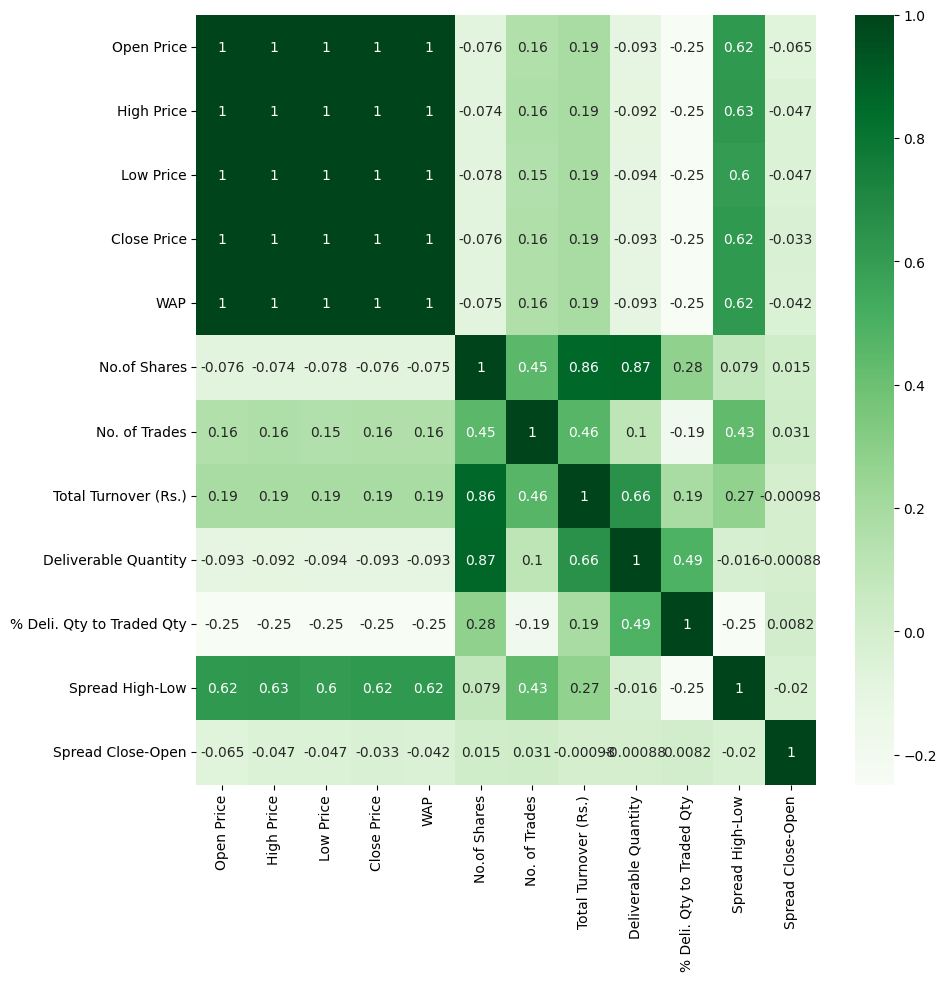

In [221]:
# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True, linecolor="Blue", cmap="Greens")
plt.show()

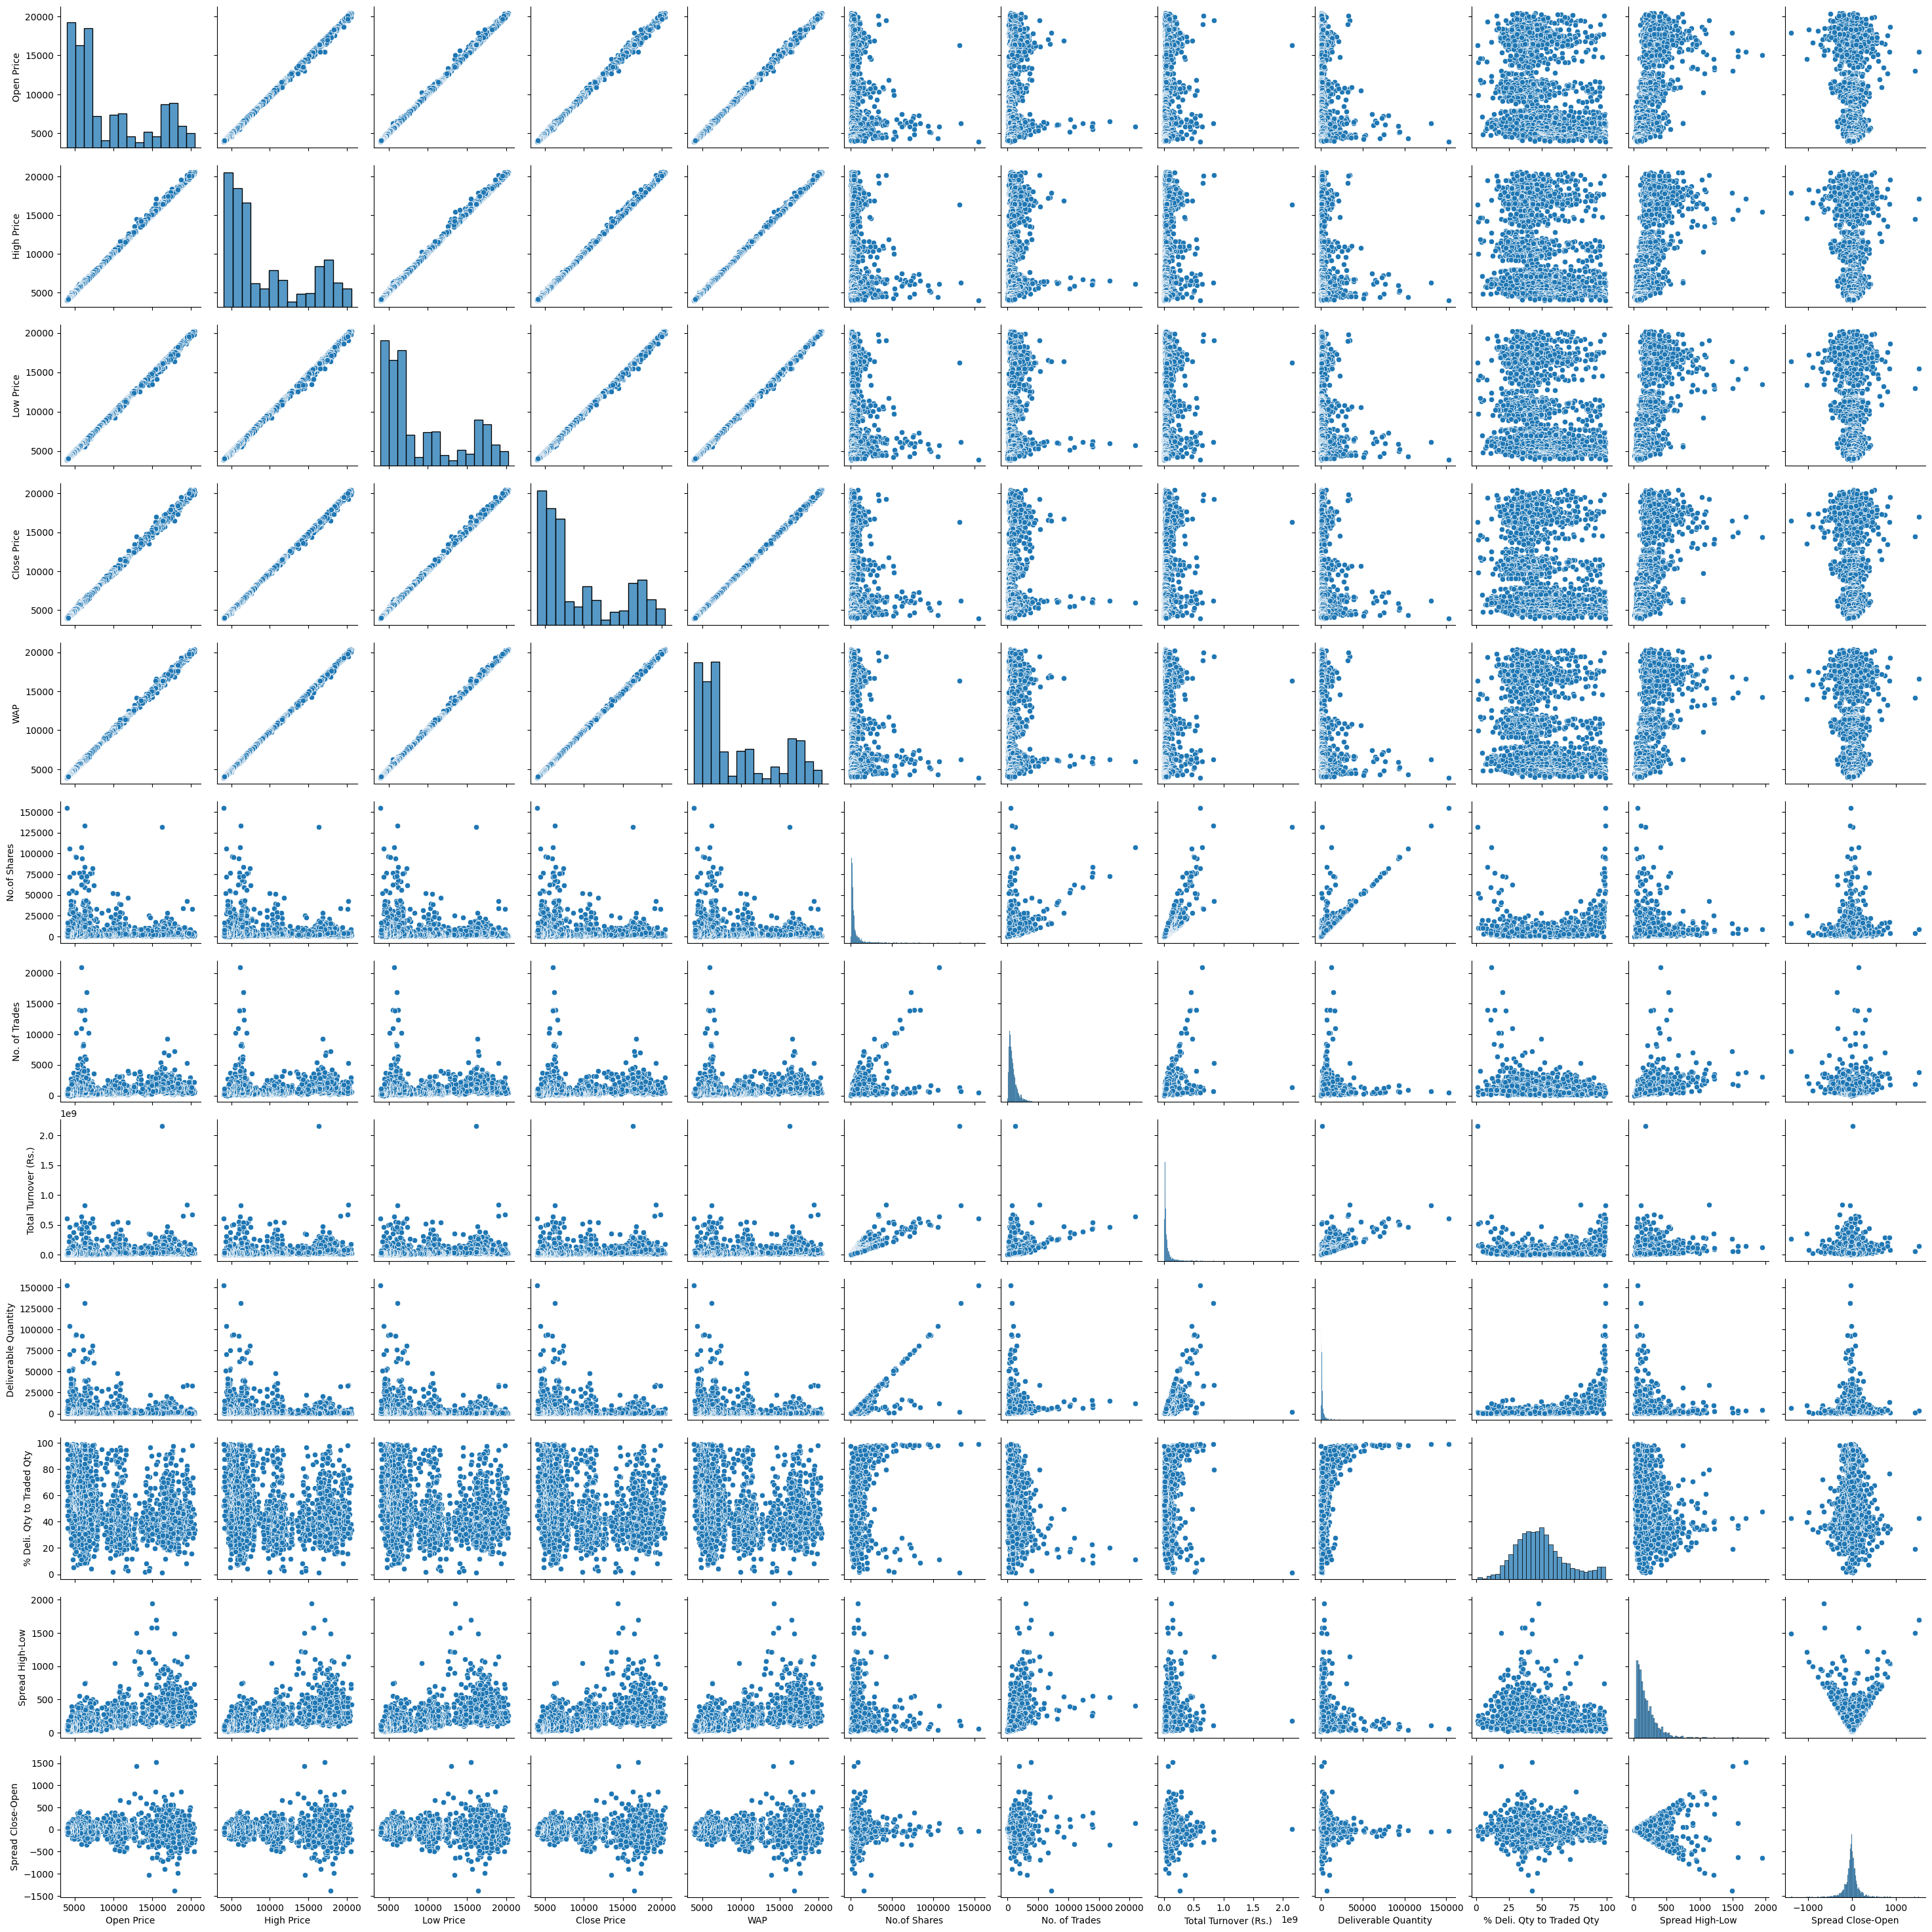

In [222]:
# Create a pairplot to visualize relationships between features
sns.pairplot(df)
plt.show()

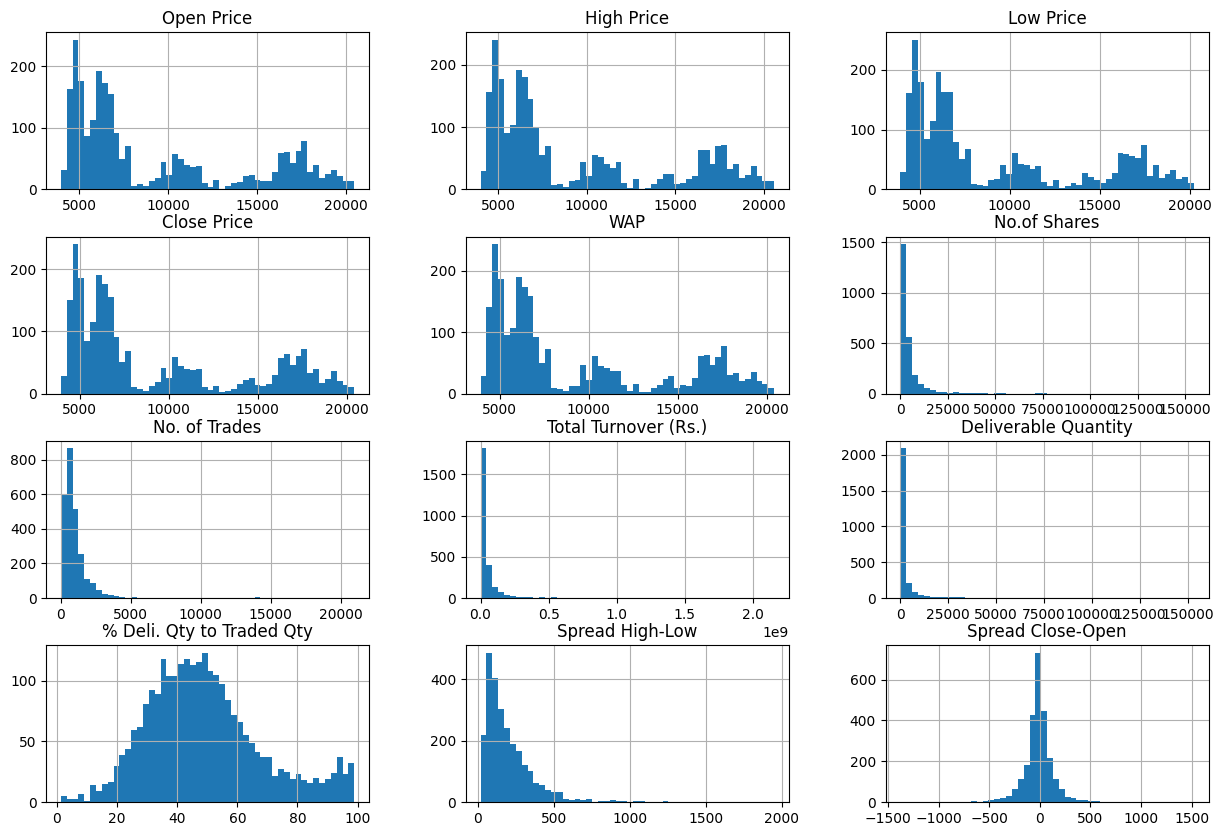

In [223]:
# Create histograms of all numerical features
df.hist(bins=50, figsize=(15, 10))
plt.show()

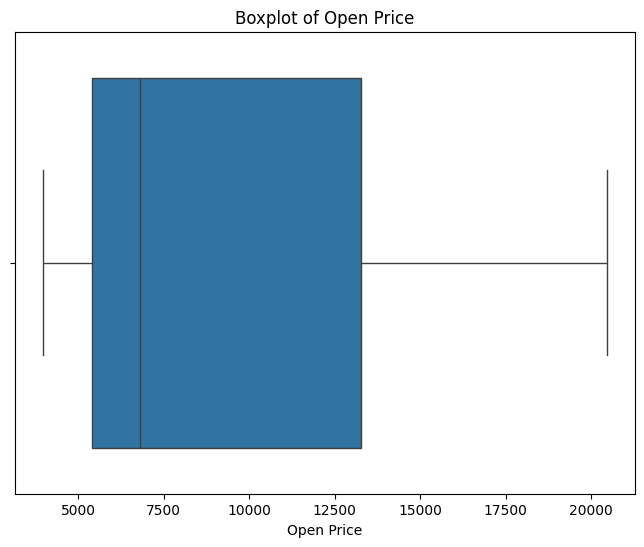

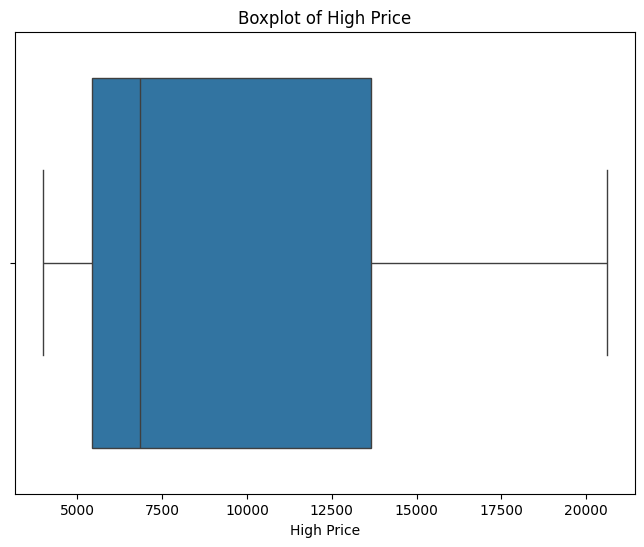

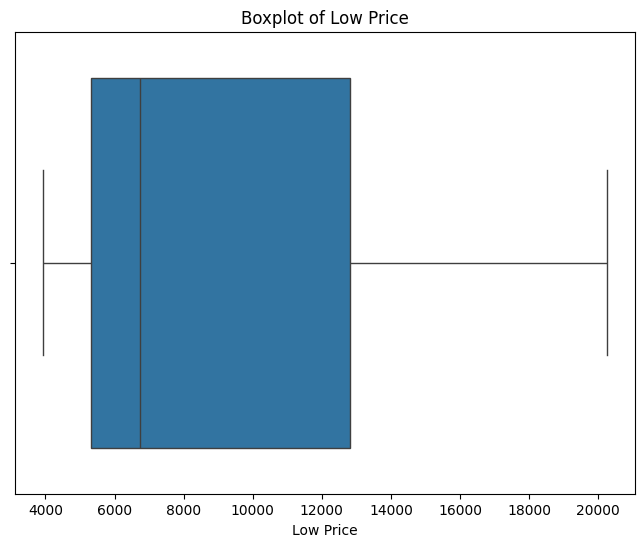

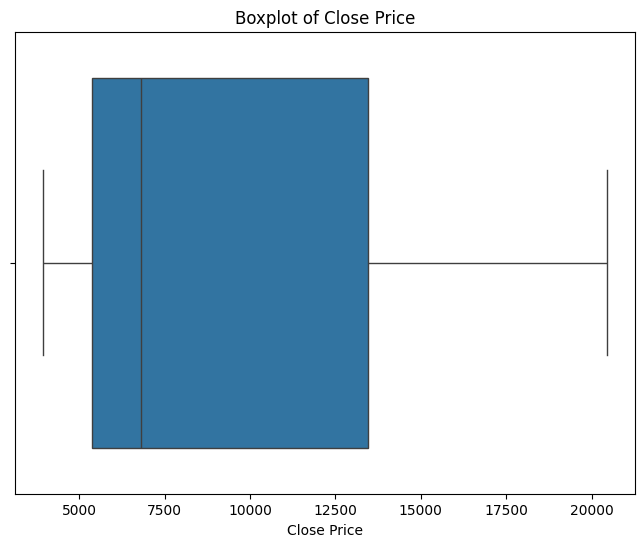

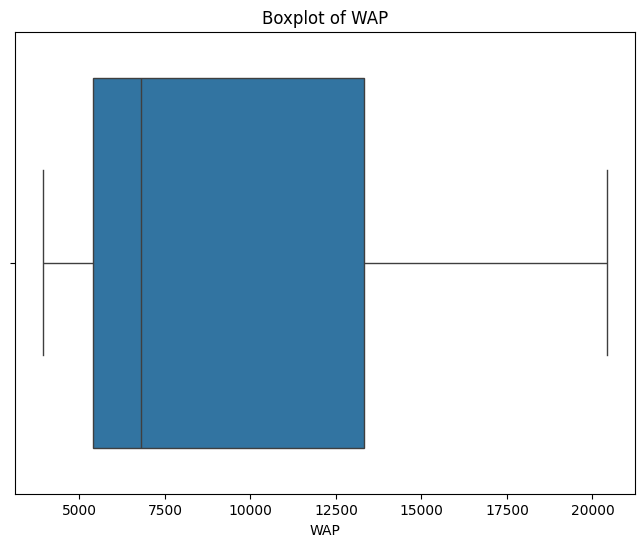

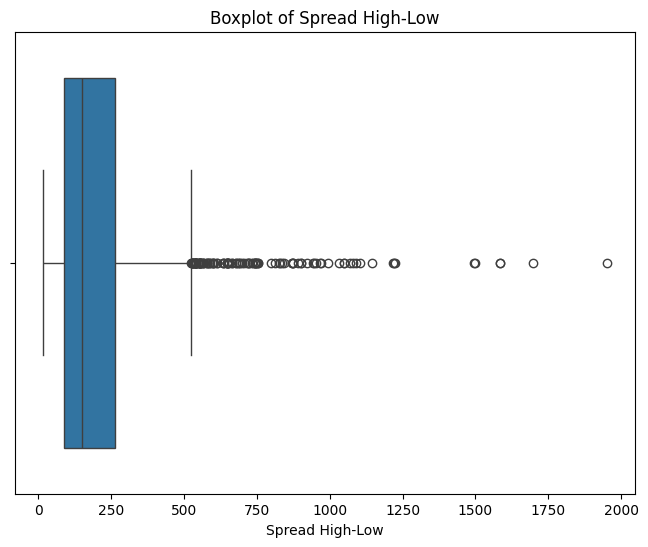

In [224]:
# Create boxplots to visualize the distribution of key features
for col in ['Open Price', 'High Price', 'Low Price', 'Close Price', 'WAP', 'Spread High-Low']:
  plt.figure(figsize=(8, 6))
  sns.boxplot(data=df, x=col)
  plt.title(f'Boxplot of {col}')
  plt.show()

<Axes: xlabel='High Price'>

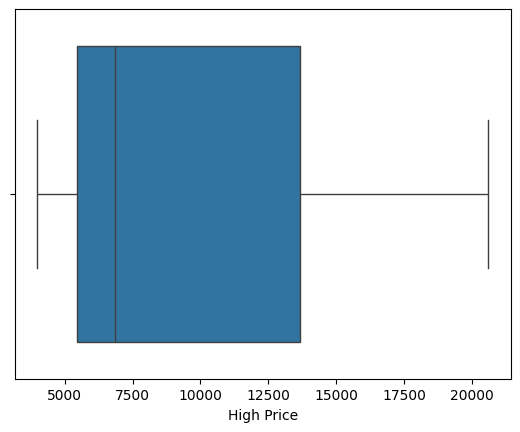

In [225]:
sns.boxplot(data=df_new,x="High Price")

<Axes: xlabel='Low Price'>

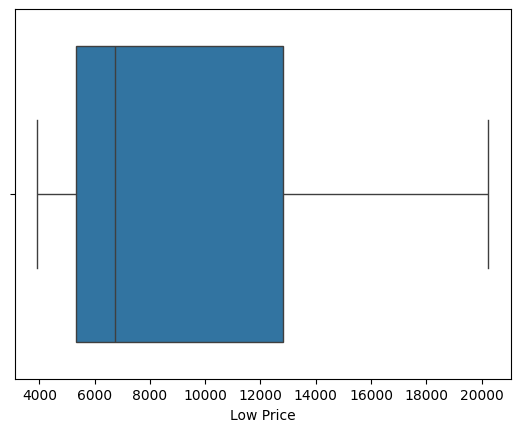

In [226]:
sns.boxplot(data=df_new,x="Low Price")

<Axes: xlabel='Close Price'>

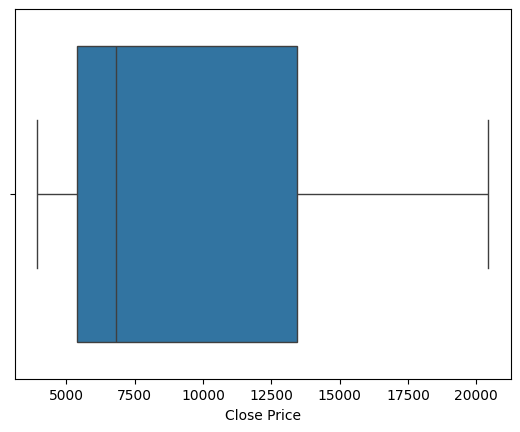

In [227]:
sns.boxplot(data=df_new,x="Close Price")

<Axes: xlabel='WAP'>

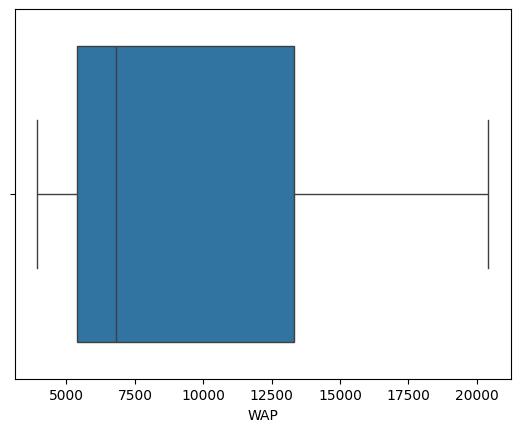

In [228]:
sns.boxplot(data=df_new,x="WAP")

<Axes: xlabel='Spread High-Low'>

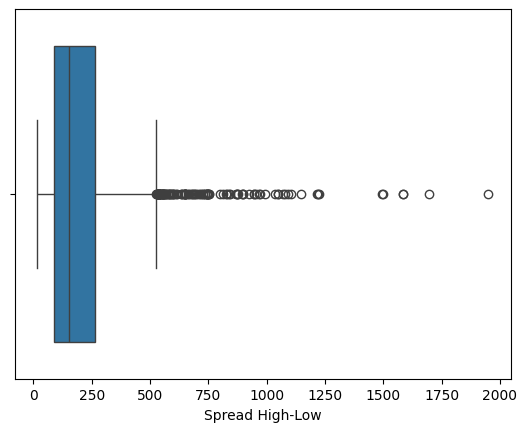

In [229]:
sns.boxplot(data=df_new,x="Spread High-Low")

## Feature Extraction


In [230]:
# Feature Engineering: Extract date components
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.weekday  # Day of the week (0=Monday, 6=Sunday)
df.drop(columns=['Date'], inplace=True)

In [231]:
df['Day'].value_counts()

,count
Day,
1,513
2,512
3,508
0,508
4,498
5,9
6,3


In [232]:
# Analyze the number of trades per year
yww = df.groupby('Year')['No. of Trades'].sum()

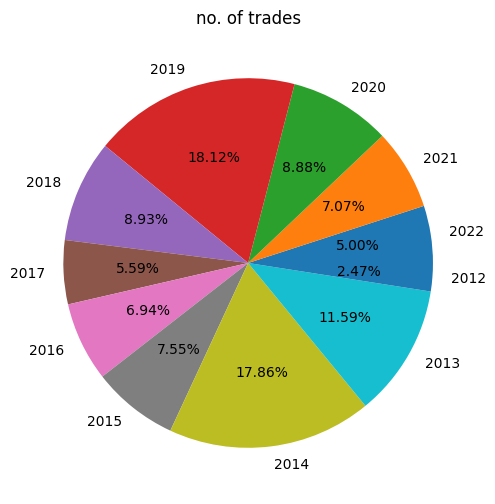

In [233]:
# Visualize the number of trades per year
plt.figure(figsize=(8,6))
plt.pie(yww, labels=df['Year'].unique(), autopct='%1.2f%%')
plt.title("no. of trades")
plt.show()

In [234]:
# Analyze the number of trades per day of the week
dw = df.groupby('Day')['No. of Trades'].sum().reset_index()

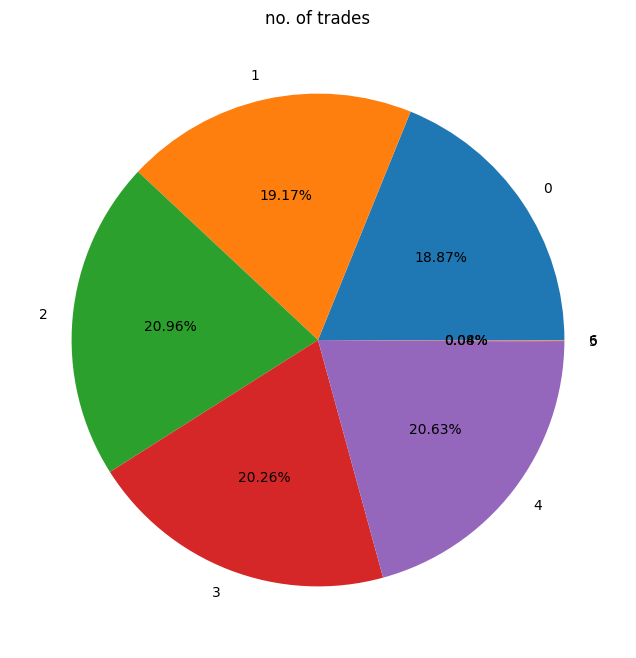

In [235]:
# Visualize the number of trades per day of the week
plt.figure(figsize=(10,8))
plt.pie(dw['No. of Trades'],labels=dw['Day'],autopct='%1.2f%%')
plt.title("no. of trades")
plt.show()

In [236]:
# Analyze High Price per day of the week
dw = df.groupby('Day')['High Price'].sum().reset_index()

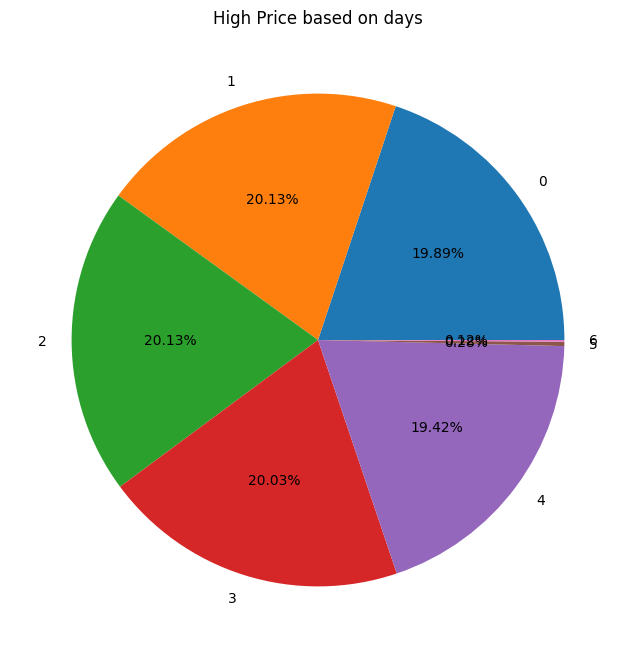

In [237]:
# Visualize High Price per day of the week
plt.figure(figsize=(10,8))
plt.pie(dw['High Price'],labels=dw['Day'],autopct='%1.2f%%')
plt.title("High Price based on days")
plt.show()

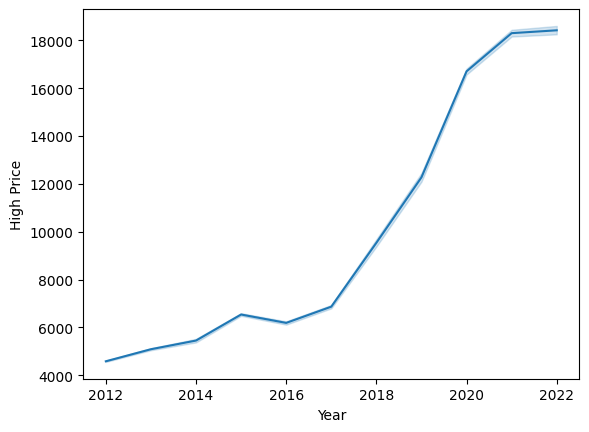

In [238]:
# Visualize trend of 'High Price' over years
sns.lineplot(data=df,x="Year",y="High Price");
plt.show()

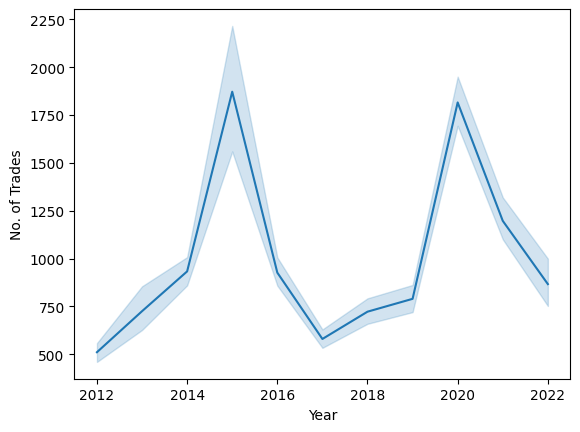

In [239]:
# Visualize trend of 'No. of Trades' over years
sns.lineplot(data=df,x="Year",y="No. of Trades");
plt.show()

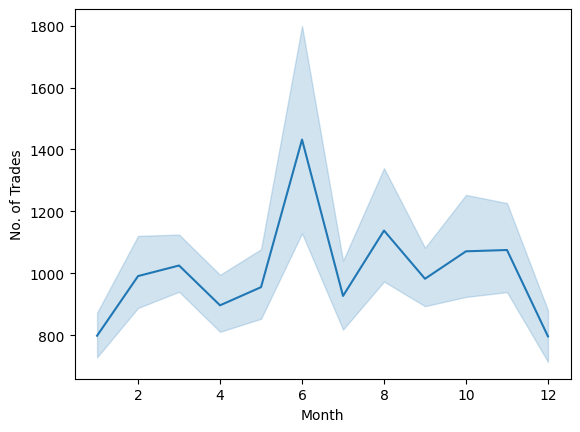

In [240]:
# Visualize trend of 'No. of Trades' over months
sns.lineplot(data=df,x="Month",y="No. of Trades");
plt.show()

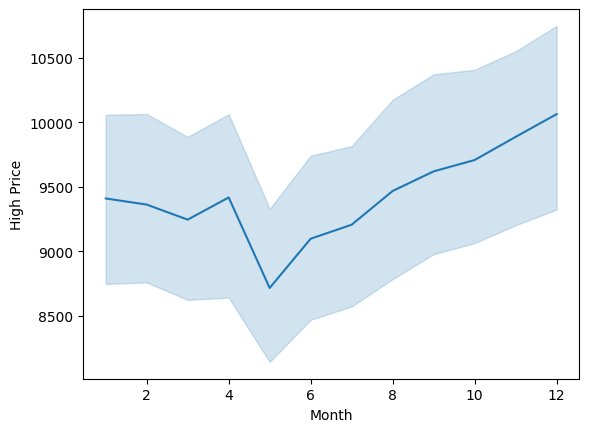

In [241]:
# Visualize trend of 'High Price' over months
sns.lineplot(data=df , x="Month",y="High Price");
plt.show()

OBSERVATIONS

From 2012 to 2022 Max. number of trades were in the years 2018 (18%) , 2014(17%) and 2013(11%) and lowest were in years 2012(2.5%) , 2017(5.6%) and 2016(6.9%)

Wednesday , Friday and Thursday are the days when maximum number of trades takes place.

Usually the stock is at high price on Wednesday , Tuesday and Thursdays.

In 2012, the stock price was at its low, the line elevated at 2015 when the price started rising and from then the line went on elevating till 2021 till April 2022 , It is somewhat constant and changes within the 18000 Range.

The line has formed a peak at the 6th month in the graph , which means that MAx no of trades happens in the month of June.

# Split the data into training and test **data**

In [242]:
# Prepare features (x_df)
x_df = pd.DataFrame()
x_df['Open Price'] = df['Open Price']
x_df['High Price'] = df['High Price']
x_df['Low Price'] = df['Low Price']
x_df['WAP'] = df['WAP']
x_df['Spread High-Low'] = df['Spread High-Low']

In [243]:
# Prepare target variable (y_df)
y_df = df['Close Price']

In [244]:
# Split data into training and testing sets
x_train,x_test,y_train,y_test = train_test_split(x_df,y_df,test_size=0.2,random_state=42)

# **Prediction using linear regression since it seems multi linear regression use case**

In [245]:
# Train a linear regression model
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [246]:
# Evaluate the model using R-squared
lr.score(x_test,y_test)

0.9998764543106008

In [247]:
# Get the intercept of the model
lr.intercept_

np.float64(-9.632240093114888)

In [248]:
# Get the coefficients of the model
print("Coefficients:", lr.coef_)

Coefficients: [-0.3270711   0.22670271  0.21423231  0.8867678   0.0124704 ]


In [249]:
# Get the feature names used by the model
lr.feature_names_in_

array(['Open Price', 'High Price', 'Low Price', 'WAP', 'Spread High-Low'],
      dtype=object)

In [250]:
x_test,y_test

(      Open Price  High Price  Low Price           WAP  Spread High-Low
 57      18718.95    18860.05   18319.25  18562.818035           540.80
 195     17521.80    17776.00   17361.95  17645.102298           414.05
 2228     4547.25     4635.00    4547.25   4599.962130            87.75
 234     16939.95    16939.95   16621.00  16684.704487           318.95
 1904     5205.50     5216.00    5165.10   5203.434302            50.90
 ...          ...         ...        ...           ...              ...
 1128     7131.75     7238.05    7070.10   7167.886288           167.95
 2459     4601.10     4654.00    4601.00   4638.800697            53.00
 1917     4960.85     5010.00    4945.00   4979.873905            65.00
 842     10450.00    10600.00   10284.55  10512.442916           315.45
 1603     6354.50     6385.25    6302.00   6330.057020            83.25
 
 [511 rows x 5 columns],
 57      18795.25
 195     17714.80
 2228     4618.60
 234     16713.75
 1904     5204.60
           ...   
 

In [251]:
# Make predictions on the test set
y_pred = lr.predict(x_test)

In [252]:
y_pred = lr.predict(x_test)

In [257]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

print("\nModel Evaluation:")
print("R^2 Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


Model Evaluation:
R^2 Score: 0.9998764543106008
MAE: 34.34973909906662
RMSE: 55.068114296008616


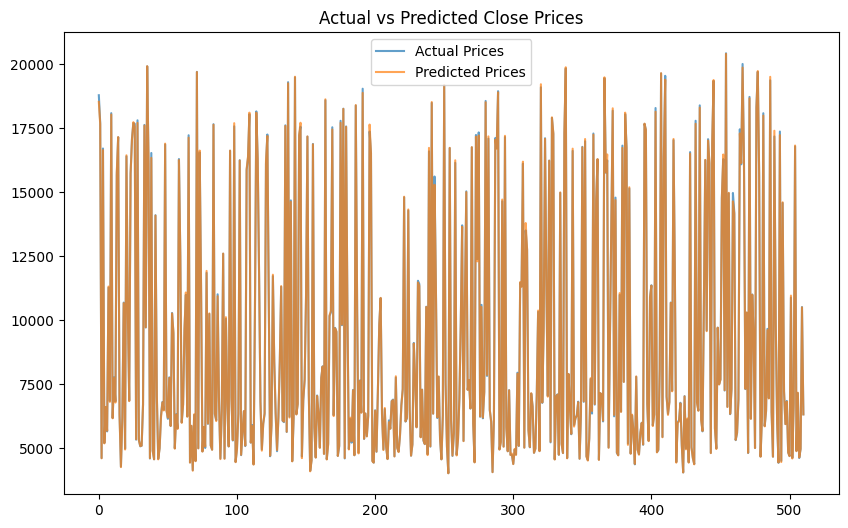

In [258]:
# ✅ 9. Visualization: Actual vs Predicted
plt.figure(figsize=(10,6))
plt.plot(y_test.values, label='Actual Prices', alpha=0.7)
plt.plot(y_pred, label='Predicted Prices', alpha=0.7)
plt.title('Actual vs Predicted Close Prices')
plt.legend()
plt.show()